# Testing
The original plan was to use data from early 2018 for testing. However such data did not exist in the dataport database. Luckily a number of houses were left out of the signature extraction procedure due to missing data. These can now be used for testing.

In [1]:
import numpy as np
import pandas as pd
import scipy.signal
from matplotlib import pyplot as plt
from scipy.ndimage.measurements import center_of_mass
import tensorflow as tf

In [2]:
data = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-ev-10houses.csv', 
                header = 0, index_col = 0)
data.index = data.index.map(lambda x: x[:-3])
data.index = pd.to_datetime(data.index)
data = data.astype(np.float64)

data2 = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-ev-10more.csv', 
                header = 0, index_col = 0)
data2.index = data2.index.map(lambda x: x[:-3])
data2.index = pd.to_datetime(data2.index)
data2 = data2.astype(np.float64)
data = data.append(data2)

data3 = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-ev-10more2.csv', 
                header = 0, index_col = 0)
data3.index = data3.index.map(lambda x: x[:-3])
data3.index = pd.to_datetime(data3.index)
data3 = data3.astype(np.float64)
data = data.append(data3)

data4 = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-ev-10more3.csv', 
                header = 0, index_col = 0)
data4.index = data4.index.map(lambda x: x[:-3])
data4.index = pd.to_datetime(data4.index)
data4 = data4.astype(np.float64)
data = data.append(data4)

data5 = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-ev-10more4.csv', 
                header = 0, index_col = 0)
data5.index = data5.index.map(lambda x: x[:-3])
data5.index = pd.to_datetime(data5.index)
data5 = data5.astype(np.float64)
data = data.append(data5)

data6 = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-ev-5last.csv', 
                header = 0, index_col = 0)
data6.index = data6.index.map(lambda x: x[:-3])
data6.index = pd.to_datetime(data6.index)
data6 = data6.astype(np.float64)
data = data.append(data6)


In [3]:
full_data_length = len(data[data['dataid'] == data['dataid'][0]])
houses = np.unique(data['dataid'])
testing_houses = []

for i in range(len(houses)):
    house_data = data[data['dataid'] == houses[i]]
    house_data_length = len(house_data)
    if house_data_length != full_data_length:
        testing_houses.append(houses[i])
        print("House {} is missing {} data points, starting at {} and ending at {}".format(houses[i], full_data_length - house_data_length, house_data.index[0], house_data.index[-1]))


House 545.0 is missing 303000 data points, starting at 2017-01-01 00:00:00 and ending at 2017-12-31 17:59:00
House 547.0 is missing 51300 data points, starting at 2017-01-01 00:00:00 and ending at 2017-12-31 17:59:00
House 1185.0 is missing 12420 data points, starting at 2017-01-01 00:00:00 and ending at 2017-12-31 17:59:00
House 1953.0 is missing 10826 data points, starting at 2017-01-01 00:00:00 and ending at 2017-12-31 17:59:00
House 2018.0 is missing 161940 data points, starting at 2017-01-01 00:00:00 and ending at 2017-12-31 17:59:00
House 2814.0 is missing 420 data points, starting at 2017-01-01 00:00:00 and ending at 2017-12-31 17:59:00
House 3723.0 is missing 349560 data points, starting at 2017-08-31 19:00:00 and ending at 2017-12-31 17:59:00
House 4336.0 is missing 41486 data points, starting at 2017-01-01 00:00:00 and ending at 2017-12-31 17:59:00
House 5357.0 is missing 558 data points, starting at 2017-01-01 00:00:00 and ending at 2017-12-31 17:59:00
House 5786.0 is missin

In [4]:
year = np.unique(data.index)
test_data = pd.DataFrame(index=year, columns=testing_houses)
test_ev_signals = pd.DataFrame(index=year, columns=testing_houses)


for i in range(len(testing_houses)):
    house_data = data[data['dataid'] == testing_houses[i]]
    house_data = house_data[~house_data.index.duplicated(keep='first')]
    house_data = house_data.reindex(test_data.index, fill_value = 0)

    test_data[testing_houses[i]] = house_data['grid']
    test_ev_signals[testing_houses[i]] = house_data['car1']

test_data = test_data.resample('15T').mean()
test_data.fillna(0,inplace=True)
test_ev_signals = test_ev_signals.resample('15T').mean()
test_ev_signals.fillna(0,inplace=True)
test_data.head()

,545.0,547.0,1185.0,1953.0,2018.0,2814.0,3723.0,4336.0,5357.0,5786.0,6139.0,6910.0
2017-01-01 00:00:00,0.681533,0.501067,0.620600,0.135267,0.956733,0.758867,0.0,6.561467,2.361867,1.232400,0.988933,0.283800
2017-01-01 00:15:00,0.617800,0.568867,0.680800,0.197733,0.827000,0.800933,0.0,6.429733,2.264000,1.693733,0.841000,0.256400
2017-01-01 00:30:00,0.666533,0.553867,0.691067,0.237867,0.706667,0.677867,0.0,6.525867,2.320467,1.065267,0.666467,0.331467
2017-01-01 00:45:00,0.592867,0.519867,0.608000,0.227600,0.810400,0.620733,0.0,6.432933,2.237333,0.985800,0.630333,0.315067
2017-01-01 01:00:00,0.655533,0.568400,0.632933,0.224867,0.834000,0.527533,0.0,6.422667,2.218667,0.918133,0.604733,0.261267


#### Note: There are duplicates in the training data

In [5]:
filters = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\cluster-means.csv', index_col=0)

In [6]:
filter_list = []
lower_bound = 2.0 * 4 #only use filters longer than 2 hours
upper_bound = 4.25 * 4 #only use filters shorter than 4.25 hours

for n in filters.columns:
    for j in filters.index:
        f = [float(i) for i in filters[n][j].strip('[]').split()]
        if len(f) >= lower_bound and len(f) <= upper_bound:
            filter_list.append([float(i) for i in filters[n][j].strip('[]').split()])

In [7]:
def find_signals(data, templates, threshold=0.4, mode='same'):
    #Finds the events corresponding to a cross correlation between the data and at least one template of above threshold.

    timeline = pd.DataFrame(np.zeros(data.shape[0]),index = data.index)
    for template in templates:
        
        if sum(template) == 0:
            continue
        
        xcorr = scipy.signal.correlate(data, template, mode=mode)
        xcorr /= xcorr.max()
        
        i=0
        while i < len(xcorr):
            if xcorr[i] >= threshold:
                timeline.loc[data.index[i]] += 1
            i+=1
        
        
    i=0
    while i < len(timeline):
        start = i
        if timeline.iloc[i][0] > 0:
            while i < len(timeline) and timeline.iloc[i][0] > 0:
                #timeline.iloc[i][0] = 0
                i+=1
            #it is important for the testing that the middle of the signal is labeled
            signal_center = start + int(center_of_mass(timeline.iloc[start:i][0])[0])
            timeline.iloc[start:i] -= timeline.iloc[start:i]
            timeline.iloc[signal_center] +=1
            #timeline.iloc[int((i+start)/2)] += 1 
        else:
            i+=1
    
    return timeline.where(timeline > 0).dropna().index

def get_signatures(power_series, min_off_duration = 0, min_on_duration = 3):
    
    signatures = []
    current_signal = []
    starts = []
    peak_times = []
    off_duration = 0
    
    for i in range(1,power_series.size):

        if power_series[i] > 1:
            if len(current_signal) == 0:
                if i == 0:
                    current_signal.append(0)
                else:
                    current_signal.append(power_series[i-1])
            current_signal.append(power_series[i])
            off_duration = 0
        else:
            off_duration += 1
            if off_duration >= min_off_duration and len(current_signal) > min_on_duration:
                if i >= len(current_signal) - 1:
                    current_signal.append(0)
                else:
                    current_signal.append(power_series[i+1])
                signatures.append(current_signal)
                starts.append(power_series.index[i-len(current_signal)])
                peak_times.extend(power_series.index[i-len(current_signal):i])
                current_signal = []
            
    return signatures, starts, pd.to_datetime(peak_times)


def filter_score(signal_times,signals_hat,n_signals):
    #True positives
    tp = np.where(np.in1d(signals_hat,signal_times))[0].shape[0]
    #False positives
    fp = np.where(np.in1d(signals_hat,signal_times,invert=True))[0].shape[0]
    #Precision
    precision = tp/(tp+fp)
    #Recall
    recall = tp/n_signals
    #F1-measure
    f1 = (2*precision*recall) / (precision + recall)
    #print('Precision: {}\nRecall: {}\nF1-score: {}'.format(precision,recall,f1))
    
    return precision,recall,f1

In [8]:
y = []

for house in test_data.columns:
    s = get_signatures(test_ev_signals[house])
    if len(s[1]) > 0:
        y.append(s)
    else:
        test_ev_signals.drop(columns=house, inplace=True)
        test_data.drop(columns=house, inplace=True)

In [9]:
test_data.head()

,545.0,547.0,1185.0,1953.0,2018.0,3723.0,4336.0,5357.0,5786.0,6139.0,6910.0
2017-01-01 00:00:00,0.681533,0.501067,0.620600,0.135267,0.956733,0.0,6.561467,2.361867,1.232400,0.988933,0.283800
2017-01-01 00:15:00,0.617800,0.568867,0.680800,0.197733,0.827000,0.0,6.429733,2.264000,1.693733,0.841000,0.256400
2017-01-01 00:30:00,0.666533,0.553867,0.691067,0.237867,0.706667,0.0,6.525867,2.320467,1.065267,0.666467,0.331467
2017-01-01 00:45:00,0.592867,0.519867,0.608000,0.227600,0.810400,0.0,6.432933,2.237333,0.985800,0.630333,0.315067
2017-01-01 01:00:00,0.655533,0.568400,0.632933,0.224867,0.834000,0.0,6.422667,2.218667,0.918133,0.604733,0.261267


In [10]:
import time

start = time.time()

threshold = np.linspace(0.3,0.8,10)
y_hat = [[] for _ in range(len(test_data.columns))]

for t in threshold:
    for i in range(len(test_data.columns)):
        y_hat[i].append(find_signals(test_data[test_data.columns[i]], filter_list, threshold=t))
    print("Threshold {} done".format(t))
end = time.time()

print("{} minutes, {} seconds".format(np.floor((end - start) / 60), (end - start) % 60))

Threshold 0.3 done
Threshold 0.3555555555555555 done
Threshold 0.4111111111111111 done
Threshold 0.4666666666666667 done
Threshold 0.5222222222222221 done
Threshold 0.5777777777777777 done
Threshold 0.6333333333333333 done
Threshold 0.6888888888888889 done
Threshold 0.7444444444444445 done
Threshold 0.8 done
75.0 minutes, 18.040257692337036 seconds


Running the filter matching with filters between lengths 2.0 and 4.25 hours took 11 minutes and 17 seconds

Running the filter matching with filters between lengths 2.0 and 4.25 hours and for five different thresholds took 39 minutes and 36 seconds

Running the filter matching with filters between lengths 2.0 and 4.25 hours and for ten different thresholds took 1 hour, 11 minutes and 36 seconds

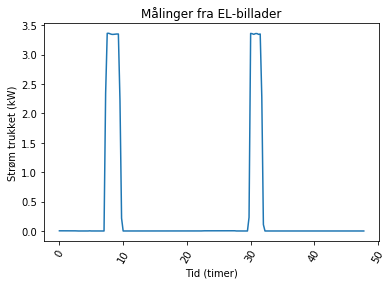

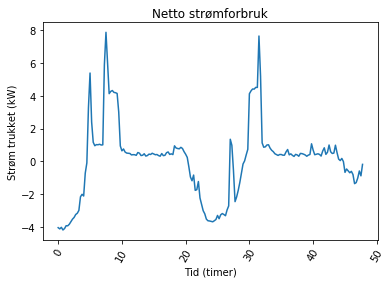

In [56]:
plt.plot(np.arange(0,48,0.25),test_ev_signals[test_ev_signals.columns[2]][24*6:24*6 + 24*4*2])
plt.xticks(rotation=60)
plt.title("Målinger fra EL-billader")
plt.xlabel("Tid (timer)")
plt.ylabel("Strøm trukket (kW)")
plt.savefig('C:\\Users\\bfesc\\Documents\\Master_thesis\\figs\\EV_stats\\sample_ev_chargings.svg')
plt.show()

plt.plot(np.arange(0,48,0.25),test_data[test_ev_signals.columns[2]][24*6:24*6 + 24*4*2])
plt.xticks(rotation=60)
plt.title("Netto strømforbruk")
plt.xlabel("Tid (timer)")
plt.ylabel("Strøm trukket (kW)")
plt.savefig('C:\\Users\\bfesc\\Documents\\Master_thesis\\figs\\EV_stats\\sample_net_grid.svg')
plt.show()


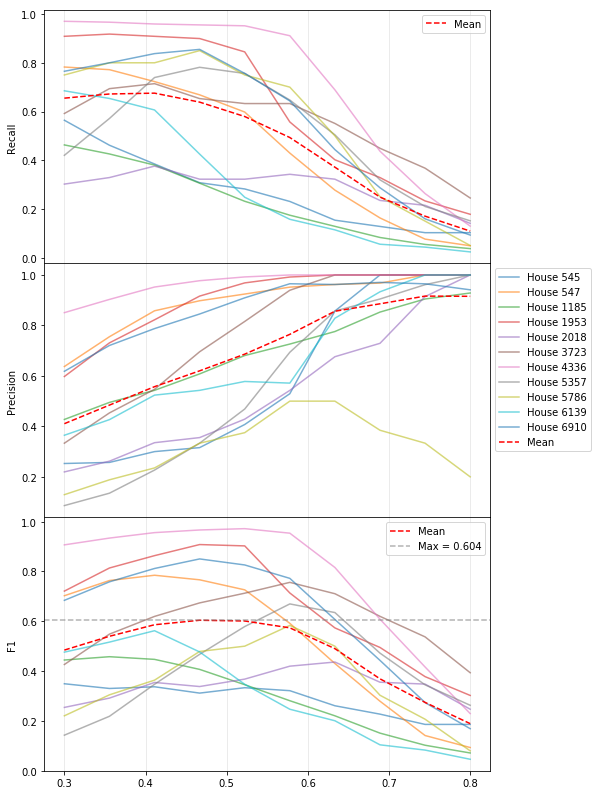

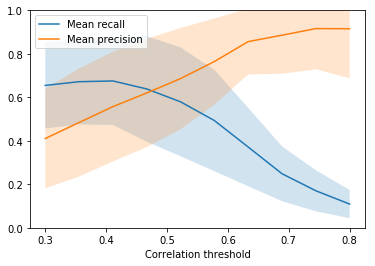

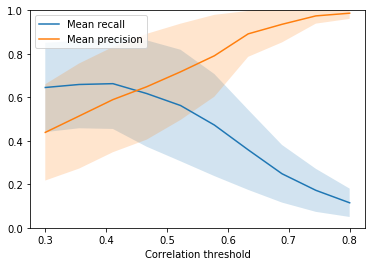

In [88]:
house_scores = [[] for _ in range(len(y_hat))]
house_recalls = [[] for _ in range(len(y_hat))]
house_precisions = [[] for _ in range(len(y_hat))]


fig, ax = plt.subplots(3, 1, sharey='row', sharex='col') 
fig.set_size_inches(8,14)
plt.subplots_adjust(hspace=0.0)

for i in range(len(y_hat)):
    for j in range(len(y_hat[i])):
        score = filter_score(y[i][2],y_hat[i][j],len(y[i][1]))
        house_scores[i].append(score[2])
        house_recalls[i].append(score[1])
        house_precisions[i].append(score[0])
        
    ax[0].plot(threshold,house_recalls[i], alpha=0.6)
    ax[1].plot(threshold,house_precisions[i], label="House {}".format(int(test_data.columns[i])), alpha=0.6)
    ax[2].plot(threshold,house_scores[i], alpha=0.6)

ax[0].plot(threshold,np.mean(house_recalls, axis=0), '--r', label="Mean")
ax[1].plot(threshold,np.mean(house_precisions, axis=0), '--r', label="Mean")
ax[2].plot(threshold,np.mean(house_scores, axis=0), '--r', label="Mean")
ax[2].axhline(np.max(np.mean(house_scores, axis=0)), linestyle='--', color='grey', label="Max = {:1.3f}".format(np.max(np.mean(house_scores,axis=0))), alpha=0.6)

ax[0].legend(bbox_to_anchor=(1,1))
ax[1].legend(bbox_to_anchor=(1,1))
ax[2].legend(bbox_to_anchor=(1,1))

ax[0].grid(axis='x', alpha=0.3)
ax[1].grid(axis='x', alpha=0.3)
ax[2].grid(axis='x', alpha=0.3)

ax[0].set_ylabel("Recall")
ax[1].set_ylabel("Precision")
ax[2].set_ylabel("F1")

plt.show()

# Only precision and recall:

rec_std = np.std(house_recalls, axis=0)
rec_mean = np.mean(house_recalls, axis=0)

prec_std = np.std(house_precisions, axis=0)
prec_mean = np.mean(house_precisions, axis=0)

f1_std = np.std(house_scores, axis=0)
f1_mean = np.mean(house_scores, axis=0)

plt.plot(threshold,rec_mean,  label="Mean recall")
plt.plot(threshold,prec_mean, label="Mean precision")
#plt.plot(threshold,f1_mean, label="Mean")

plt.fill_between(threshold, rec_mean - rec_std, rec_mean + rec_std, alpha=0.2)
plt.fill_between(threshold, prec_mean - prec_std, prec_mean + prec_std, alpha=0.2)
#plt.fill_between(threshold, rec_mean - rec_std, rec_mean + rec_std, alpha=0.2)

plt.ylim(0,1)
plt.legend()
plt.xlabel("Correlation threshold")
plt.savefig('C:\\Users\\bfesc\\Documents\\Master_thesis\\figs\\EV_stats\\mf_precision_recall.svg')
plt.show()

# Without outlier 
rec_std = np.std(np.concatenate((house_recalls[:8], house_recalls[9:])), axis=0)
rec_mean = np.mean(np.concatenate((house_recalls[:8], house_recalls[9:])), axis=0)

prec_std = np.std(np.concatenate((house_precisions[:8], house_precisions[9:])), axis=0)
prec_mean = np.mean(np.concatenate((house_precisions[:8], house_precisions[9:])), axis=0)

f1_std = np.std(house_scores[:8] + house_recalls[9:], axis=0)
f1_mean = np.mean(house_scores[:8] + house_recalls[9:], axis=0)

plt.plot(threshold,rec_mean,  label="Mean recall")
plt.plot(threshold,prec_mean, label="Mean precision")
#plt.plot(threshold,f1_mean, label="Mean")

plt.fill_between(threshold, rec_mean - rec_std, rec_mean + rec_std, alpha=0.2)
plt.fill_between(threshold, prec_mean - prec_std, prec_mean + prec_std, alpha=0.2)
#plt.fill_between(threshold, rec_mean - rec_std, rec_mean + rec_std, alpha=0.2)

plt.ylim(0,1)
plt.legend()
plt.xlabel("Correlation threshold")
plt.savefig('C:\\Users\\bfesc\\Documents\\Master_thesis\\figs\\EV_stats\\mf_precision_recall_no_outlier.svg')
plt.show()

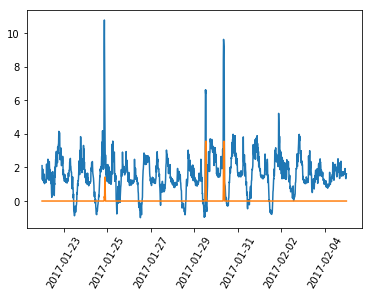

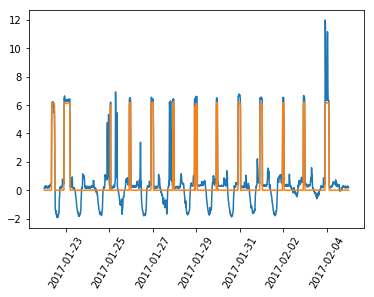

In [13]:
week = 24*7*4
start = week*3
end = week*5

plt.plot(test_data[5786.0][start:end])
plt.plot(test_ev_signals[5786.0][start:end])
plt.xticks(rotation=60)
plt.show()

plt.plot(test_data[4336.0][start:end])
plt.plot(test_ev_signals[4336.0][start:end])
plt.xticks(rotation=60)
plt.show()

### House 5786 is an outlier
The house with id 5786 tested at among the lowest F1-scores. Significantly, it also was the only household where a higher matched filter correlation threshold led to a *decrease* in precision. There may be an error with the measured EV charging data, but either way the house is a significant outlier, being the oldest and among the three largest houses in the training or testing data.

In [14]:
metadata = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-metadata.csv', 
                header = 0, index_col = 0)

In [15]:
use_data = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-use-data-1hr.csv', 
                header = 0, index_col = 0)
use_data.index = use_data.index.map(lambda x: x[:-3])
use_data.index = pd.to_datetime(use_data.index)
use_data = use_data.astype(np.float64)

print(len(np.unique(use_data['dataid'])))

54


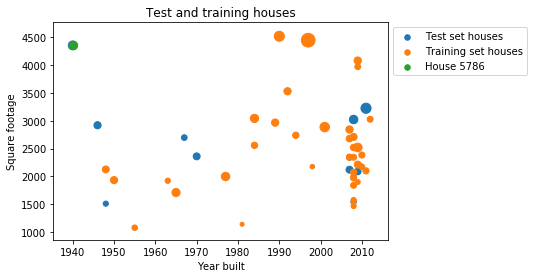

In [89]:
training_houses = houses[np.where(np.in1d(houses,testing_houses,invert=True))]

square_footage = np.zeros(len(test_data.columns))
year_built = np.zeros(len(test_data.columns))
mean_power_usage = np.zeros(len(test_data.columns))

sqft_train = np.zeros(len(training_houses))
year_train = np.zeros(len(training_houses))
mean_power_train = np.zeros(len(training_houses))

for i in range(len(test_data.columns)):
    square_footage[i] += metadata['total_square_footage'][test_data.columns[i]]
    year_built[i] += metadata['house_construction_year'][test_data.columns[i]]
    mean_power_usage[i] += np.mean(use_data[use_data['dataid'] == test_data.columns[i]]['use'])
    
for i in range(len(training_houses)):
    sqft_train[i] += metadata['total_square_footage'][training_houses[i]]
    year_train[i] += metadata['house_construction_year'][training_houses[i]]
    mean_power_train[i] += np.mean(use_data[use_data['dataid'] == training_houses[i]]['use'])
    
plt.scatter(year_built, square_footage, label="Test set houses", s=mean_power_usage*30)
plt.scatter(year_train, sqft_train, label="Training set houses", s=mean_power_train*30)
plt.scatter(metadata['house_construction_year'][5786], metadata['total_square_footage'][5786], label="House 5786", s=np.mean(data[data['dataid'] == 5786]['grid'])*30)

lgd = legend = plt.legend(bbox_to_anchor=(1,1))
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.title("Test and training houses")
plt.xlabel("Year built")
plt.ylabel("Square footage")

plt.savefig('C:\\Users\\bfesc\\Documents\\Master_thesis\\figs\\EV_stats\\outlier.svg', bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

# A closer look at the houses

In [17]:
all_houses = np.unique(data['dataid'])
hour_houses = np.unique(use_data['dataid'])
for house in all_houses:
    if house not in hour_houses:
        print(house)

9934.0


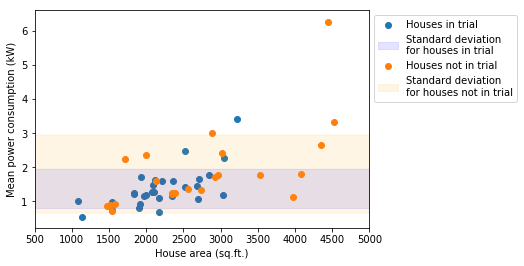

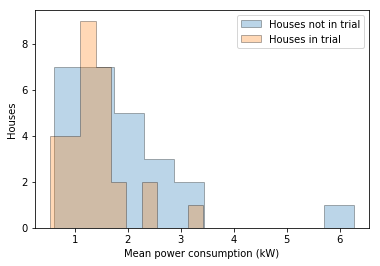

In [18]:
sqft2 = []
mpu2 = []

for house in hour_houses:
    if not pd.isna(metadata['program_ccet_group'][house]):
        sqft2.append(metadata['total_square_footage'][house])
        mpu2.append(np.mean(use_data[use_data['dataid'] == house]['use']))

plt.scatter(sqft2, mpu2, label="Houses in trial")

#plt.axhline(np.mean(mpu2), color='blue', linestyle='--', label='Mean for houses enrolled in trial')
plt.fill_between(np.arange(500,5000), np.mean(mpu2) - np.std(mpu2), np.mean(mpu2) + np.std(mpu2), color='blue', alpha=0.1,
                label='Standard deviation\nfor houses in trial')

sqft3 = []
mpu3 = []

for house in hour_houses:
    if pd.isna(metadata['program_ccet_group'][house]):
        sqft3.append(metadata['total_square_footage'][house])
        mpu3.append(np.mean(use_data[use_data['dataid'] == house]['use']))

plt.scatter(sqft3, mpu3, label="Houses not in trial")

#plt.axhline(np.mean(mpu3), color='orange', linestyle='--')
plt.fill_between(np.arange(500,5000), np.mean(mpu3) - np.std(mpu3), np.mean(mpu3) + np.std(mpu3), color='orange', alpha=0.1,
                 label='Standard deviation\nfor houses not in trial')
plt.xlim(500,5000)

plt.xlabel("House area (sq.ft.)")
plt.ylabel("Mean power consumption (kW)")
lgd = plt.legend(bbox_to_anchor=(1,1))
plt.savefig('C:\\Users\\bfesc\\Documents\\Master_thesis\\figs\\house_power_usage.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

plt.hist(mpu3, label="Houses not in trial", alpha=0.3, histtype='stepfilled', edgecolor='black')
plt.hist(mpu2, label="Houses in trial", alpha=0.3, histtype='stepfilled', edgecolor='black')
plt.xlabel("Mean power consumption (kW)")
plt.ylabel("Houses")
plt.legend()

plt.show()

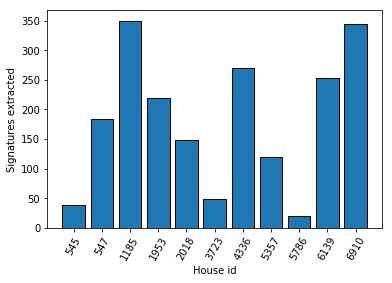

In [19]:
plt.bar(np.arange(len(y)),[len(hs[0]) for hs in y], edgecolor='black')
plt.xticks(np.arange(len(y)), [int(hs) for hs in test_data.columns], rotation=60)
plt.xlabel("House id")
plt.ylabel("Signatures extracted")
plt.show()

In [20]:
# for house in np.unique(data['dataid']):
#     print("House {}:    CCET - {}".format(house, metadata['program_ccet_group'][house]))

print("ENROLLED IN TRIAL:")
for house in np.unique(data['dataid']):
    if not pd.isna(metadata['program_ccet_group'][house]):
        if house in test_data.columns:
            print("{} {} enrolled in {} - TEST".format(metadata['building_type'][house], house, metadata['program_ccet_group'][house]))
        else:
            print("{} {} enrolled in {}".format(metadata['building_type'][house], house, metadata['program_ccet_group'][house]))

print("\nNOT ENROLLED:")
for house in np.unique(data['dataid']):
    if pd.isna(metadata['program_ccet_group'][house]):
        if house in test_data.columns:
            print("{} {} - TEST".format(metadata['building_type'][house],house))
        else:
            print("{} {}".format(metadata['building_type'][house],house))

ENROLLED IN TRIAL:
Single-Family Home 26.0 enrolled in CCET - Pricing Trial
Single-Family Home 114.0 enrolled in CCET - Pricing Trial
Single-Family Home 370.0 enrolled in CCET - Pricing Trial
Single-Family Home 545.0 enrolled in CCET - Text Message - TEST
Single-Family Home 1185.0 enrolled in CCET - Pricing Trial - TEST
Single-Family Home 1714.0 enrolled in CCET - Control
Single-Family Home 2470.0 enrolled in CCET - Pricing Trial
Town Home 2638.0 enrolled in CCET - UT Text
Single-Family Home 2814.0 enrolled in CCET - Control
Single-Family Home 3036.0 enrolled in CCET - Pricing Trial
Single-Family Home 3367.0 enrolled in CCET - UT Text
Town Home 3482.0 enrolled in CCET - Pricing Trial
Single-Family Home 3723.0 enrolled in CCET - Pricing Trial - TEST
Single-Family Home 3967.0 enrolled in CCET - Pricing Trial
Single-Family Home 4336.0 enrolled in CCET - Control - TEST
Single-Family Home 4526.0 enrolled in CCET - Pricing Trial
Single-Family Home 4998.0 enrolled in CCET - Pricing Trial
Sing